In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

<h1 align="center">Método de Beltrán: Tubo 2 - Todas las muestras</h1>

In [2]:
deltaPVC=4.86614272E-06
betaPVC = 1.11006727E-07
deltaAgua = 3.67657117E-06
betaAgua = 1.29107205E-08
deltaAire=4.28039426E-09
betaAire=1.17440589E-11
deltaSangreArtificial=6.00424619E-06
betaSangreArtificial=3.11726325E-08
deltaYodo=1.35432474E-05
betaYodo=1.82601411E-06

In [3]:
def Raws(name):
    RAW = np.rot90(np.genfromtxt(name),1)
    s = np.zeros((len(RAW),len(RAW[0])))
    for i in range(len(RAW)):
        for j in range(len(RAW)):
            if np.isnan(RAW[i,j]):
                RAW[i,j] = 0.0
    for i in range(len(RAW)):
        for j in range(len(RAW[0])):
            if RAW[i,j] == 0.0:
                a = i
                b = j
                c = 0
                suma = 0
                borde = 0
                for k in range(a-1, a+2):
                    for n in range(b-1, b+2):   
                        try:
                            suma += RAW[k,n]
                            if RAW[k,n] == 0.0:
                                c = c + 1
                        except:
                            borde = 1

                if borde == 0:
                    RAW[i,j] = suma/(9-c)
                else:
                    RAW[i,j] = suma/(6-c)
    return RAW

In [4]:
def FF(name, numArchivos):
    FF=[]
    for j in range(numArchivos):
        if j<10:
            FF.append(np.genfromtxt("{}_0{}.txt".format(name,j)))
        if j>=10 and j<numArchivos:
            FF.append(np.genfromtxt("{}_{}.txt".format(name,j)))
    FFmean=np.zeros((len(FF[0]), len(FF[0])))
    for j in range(len(FF)):
        FFmean=FFmean+FF[j]
    FFmean=np.rot90(FFmean,1)
    s = np.zeros((len(FFmean),len(FFmean[0])))
    for i in range(len(FFmean)):
        for j in range(len(FFmean)):
            if np.isnan(FFmean[i,j]):
                FFmean[i,j] = 0.0
    for i in range(len(FFmean)):
        for j in range(len(FFmean[0])):
            if FFmean[i,j] == 0.0:
                a = i
                b = j
                c = 0
                suma = 0
                borde = 0
                for k in range(a-1, a+2):
                    for n in range(b-1, b+2):   
                        try:
                            suma += FFmean[k,n]
                            if FFmean[k,n] == 0.0:
                                c = c + 1
                        except:
                            borde = 1

                if borde == 0:
                    FFmean[i,j] = suma/(9-c)
                else:
                    FFmean[i,j] = suma/(6-c)
    return FFmean

In [5]:
def RawsC(name1, name2, numArchivos):
    RAWC=(Raws(name1)/FF(name2, numArchivos))
    RAWCC=(RAWC-np.min(RAWC))/(np.max(RAWC)-np.min(RAWC))
    return RAWCC

In [6]:
def Esp(name, a, delta, beta, E, z):
    frr = np.fft.fft2(name)
    frr = np.fft.fftshift(frr)
    Npixeles = len(name)
    array_dist=np.zeros((Npixeles,Npixeles))
    for i in range(0,Npixeles):
        for j in range(0, Npixeles):
            r=((2*np.pi*((Npixeles/2)-i))/(Npixeles*a))**2+((2*np.pi*((Npixeles/2)-j))/(Npixeles*a))**2
            array_dist[i,j]=r
    E_J=E*1.6*(10**(-16))
    h=10**(-34)
    c=3*(10**(8))
    k=E_J/(h*c)
    W=(delta*z)/(2*beta*k)
    AA=np.ones((Npixeles,Npixeles))
    Q=AA+W*array_dist
    A=frr/Q
    f_ishift = np.fft.ifftshift(A)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    A1=-(1/(2*k*beta))*np.log(img_back)
    return A1

In [7]:
def PI(name):
    P=np.zeros(256)
    for i in range(len(name)):
        P=P+name[i,:]
    mean=P/len(name)
    return mean

### Sangre artificial

In [8]:
E=7.88
E_J=E*1.6*(10**(-16))
h=10**(-34)
c=3*(10**(8))
k=E_J/(h*c)
a=5.5*(10**(-5))
E=7.88
z=1.2

In [9]:
name1 = "./datos/2022-09-02 - Muestra de Sangre Artificial/1. RAW_tubo2_sangre/RAW.txt"
name2 = "./datos/2022-09-02 - Muestra de Sangre Artificial/2. FF/FF"
delta_m1=4.86614272E-06
beta_m1=1.11006727E-07
delta_rel=np.abs(deltaSangreArtificial-delta_m1)
beta_rel=np.abs(betaSangreArtificial-beta_m1)

In [10]:
RAW=Raws(name1)
FF_=FF(name2, 59)
RAWC=RAW/FF_
M1_RAW=Esp(RAWC, a, delta_m1, beta_m1, E, z)
RAW_M2=RAW/(FF_*np.exp(-2*k*beta_m1*M1_RAW))
M_RAW1=Esp(RAW_M2, a, delta_rel, beta_rel, E, z)

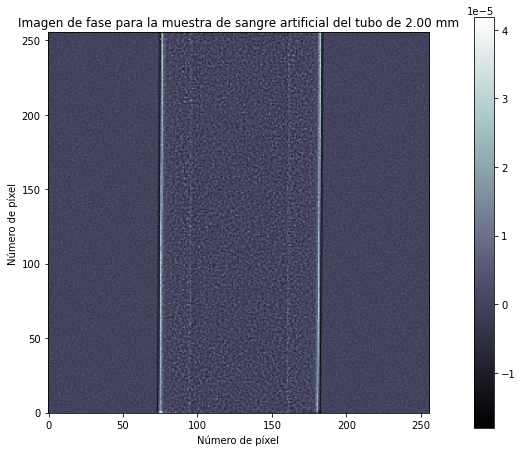

In [11]:
plt.figure(figsize=(8,8))
im = plt.imshow(M_RAW1, cmap="bone")
plt.ylabel('Número de píxel')
plt.xlabel('Número de píxel')
plt.title('Imagen de fase para la muestra de sangre artificial del tubo de 2.00 mm')
plt.gca().invert_yaxis()
plt.colorbar(im,fraction=0.046, pad=0.1)
plt.show()

In [12]:
RAWC=(RAWC-np.min(RAWC))/(np.max(RAWC)-np.min(RAWC))
M_RAW_sangre=(M_RAW1-np.min(M_RAW1))/(np.max(M_RAW1)-np.min(M_RAW1))

### Aire

In [13]:
name1 = "./datos/2022-09-02 - Muestra de Aire/1. RAW_tubo2_sangre/RAW.txt"
name2 = "./datos/2022-09-02 - Muestra de Aire/2. FF/FF"
delta_m1=4.86614272E-06
beta_m1=1.11006727E-07
delta_rel=np.abs(deltaAire-delta_m1)
beta_rel=np.abs(betaAire-beta_m1)

In [14]:
RAW=Raws(name1)
FF_=FF(name2, 59)
RAWC=RAW/FF_
M1_RAW=Esp(RAWC, a, delta_m1, beta_m1, E, z)
RAW_M2=RAW/(FF_*np.exp(-2*k*beta_m1*M1_RAW))
M_RAW1=Esp(RAW_M2, a, delta_rel, beta_rel, E, z)

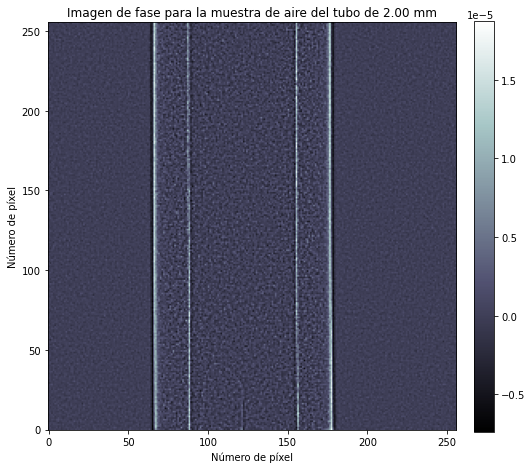

In [15]:
plt.figure(figsize=(8,8))
im = plt.imshow(M_RAW1, cmap="bone")
plt.ylabel('Número de píxel')
plt.xlabel('Número de píxel')
plt.title('Imagen de fase para la muestra de aire del tubo de 2.00 mm')
plt.gca().invert_yaxis()
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.show()

In [16]:
RAWC=(RAWC-np.min(RAWC))/(np.max(RAWC)-np.min(RAWC))
M_RAW_aire=(M_RAW1-np.min(M_RAW1))/(np.max(M_RAW1)-np.min(M_RAW1))

### Agua

In [17]:
name1 = "./datos/2022-09-20 - Muestra de Agua/1. RAW_tubo1_sangre/RAW.txt"
name2 = "./datos/2022-09-20 - Muestra de Agua/2. FF/FF"
delta_m1=4.86614272E-06
beta_m1=1.11006727E-07
delta_rel=np.abs(deltaAgua-delta_m1)
beta_rel=np.abs(betaAgua-beta_m1)

In [18]:
RAW=Raws(name1)
FF_=FF(name2, 59)
RAWC=RAW/FF_
M1_RAW=Esp(RAWC, a, delta_m1, beta_m1, E, z)
RAW_M2=RAW/(FF_*np.exp(-2*k*beta_m1*M1_RAW))
M_RAW1=Esp(RAW_M2, a, delta_rel, beta_rel, E, z)

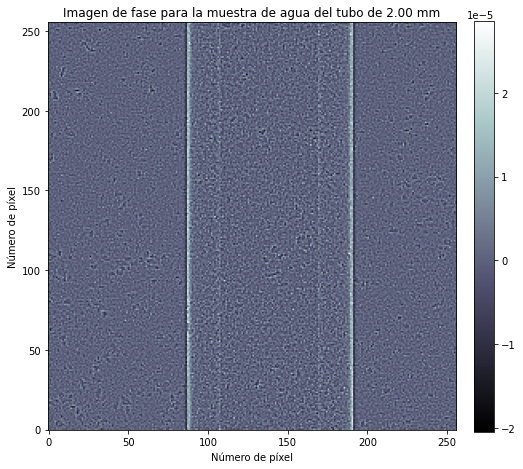

In [19]:
plt.figure(figsize=(8,8))
im = plt.imshow(M_RAW1, cmap="bone")
plt.ylabel('Número de píxel')
plt.xlabel('Número de píxel')
plt.title('Imagen de fase para la muestra de agua del tubo de 2.00 mm')
plt.gca().invert_yaxis()
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.show()

In [20]:
RAWC=(RAWC-np.min(RAWC))/(np.max(RAWC)-np.min(RAWC))
M_RAW_agua=(M_RAW1-np.min(M_RAW1))/(np.max(M_RAW1)-np.min(M_RAW1))

### Yodopovidona

In [21]:
name1 = "./datos/2022-09-02 - Muestra de Yodopovidona/1. RAW_tubo3_sangre/RAW.txt"
name2 = "./datos/2022-09-02 - Muestra de Yodopovidona/2. FF/FF"
delta_m1=4.86614272E-06
beta_m1=1.11006727E-07
delta_rel=np.abs(deltaYodo-delta_m1)
beta_rel=np.abs(betaYodo-beta_m1)

In [22]:
RAW=Raws(name1)
FF_=FF(name2, 59)
RAWC=RAW/FF_
M1_RAW=Esp(RAWC, a, delta_m1, beta_m1, E, z)
RAW_M2=RAW/(FF_*np.exp(-2*k*beta_m1*M1_RAW))
M_RAW1=Esp(RAW_M2, a, delta_rel, beta_rel, E, z)

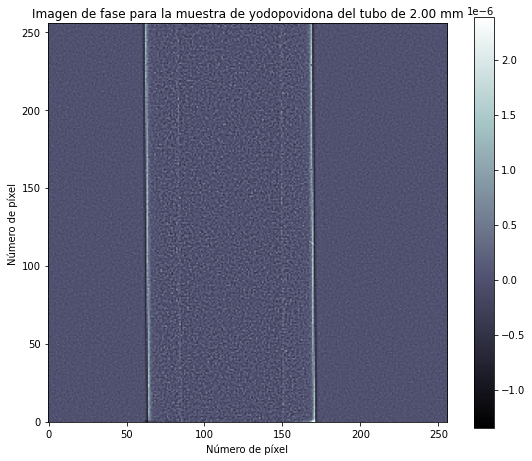

In [24]:
plt.figure(figsize=(8,8))
im = plt.imshow(M_RAW1, cmap="bone")
plt.ylabel('Número de píxel')
plt.xlabel('Número de píxel')
plt.title('Imagen de fase para la muestra de yodopovidona del tubo de 2.00 mm')
plt.gca().invert_yaxis()
plt.colorbar(im,fraction=0.046, pad=0.06)
plt.show()

In [25]:
RAWC=(RAWC-np.min(RAWC))/(np.max(RAWC)-np.min(RAWC))
M_RAW_yodo=(M_RAW1-np.min(M_RAW1))/(np.max(M_RAW1)-np.min(M_RAW1))

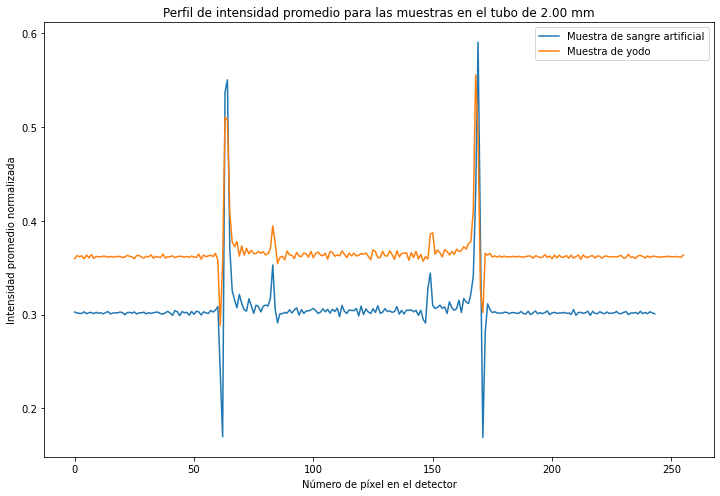

In [26]:
plt.figure(figsize=(12,8))
plt.plot(PI(M_RAW_sangre)[12:],label="Muestra de sangre artificial")
plt.plot(PI(M_RAW_yodo),label="Muestra de yodo")
plt.title("Perfil de intensidad promedio para las muestras en el tubo de 2.00 mm")
plt.ylabel("Intensidad promedio normalizada")
plt.xlabel("Número de píxel en el detector")
plt.legend()
plt.show()

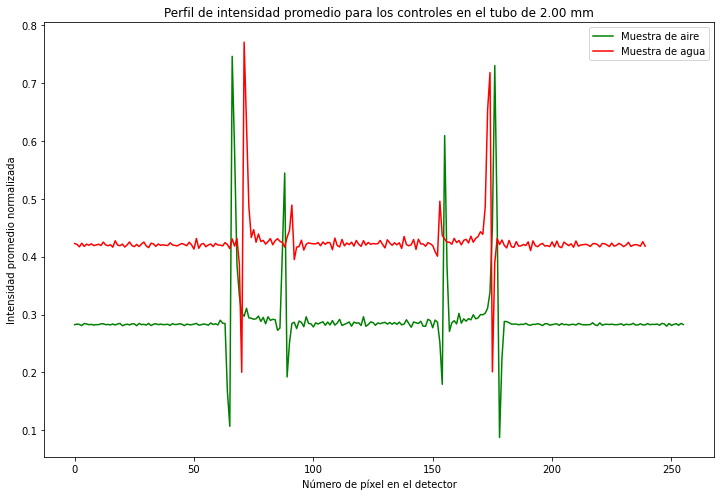

In [27]:
plt.figure(figsize=(12,8))
plt.plot(PI(M_RAW_aire),label="Muestra de aire", c="green")
plt.plot(PI(M_RAW_agua)[16:],label="Muestra de agua", c="red")
plt.title("Perfil de intensidad promedio para los controles en el tubo de 2.00 mm")
plt.ylabel("Intensidad promedio normalizada")
plt.xlabel("Número de píxel en el detector")
plt.legend()